# Titanic

Datasource - Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

###DataDictionary

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

## Reading Data

### Import required libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

###Import dataset

In [2]:
titanic=pd.read_csv('https://raw.githubusercontent.com/sivarubiny/Titanic/main/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##Data Pre processing

### Clean continuous variables

#### Fill missing for `Age`

In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#fill missing value with mean age value and replace the column
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

#### Combine `SibSp` & `Parch`

<Figure size 432x288 with 0 Axes>

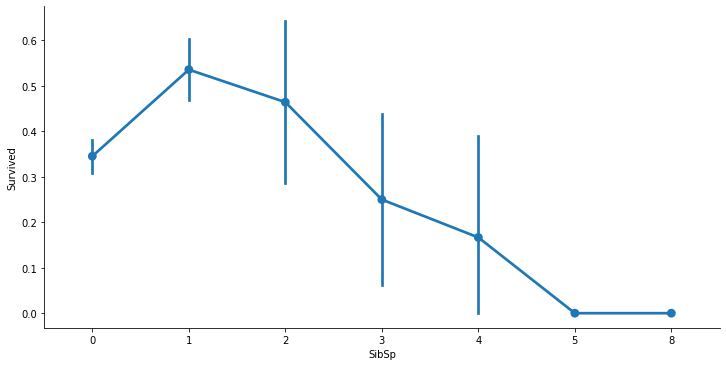

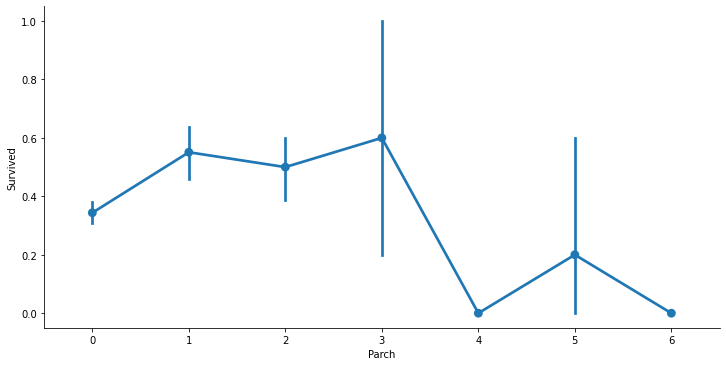

In [6]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )

In [7]:
titanic['Family_cnt']=titanic['SibSp']+titanic['Parch']

<Figure size 432x288 with 0 Axes>

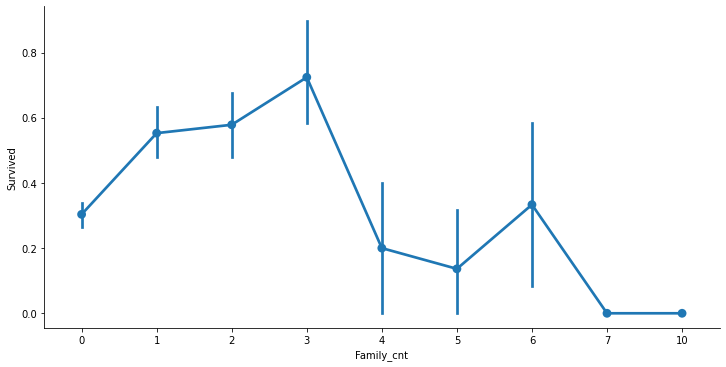

In [8]:
for i, col in enumerate(['Family_cnt']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )

#### Drop unnnecessary variables

In [9]:
titanic.drop(['PassengerId','SibSp','Parch'],axis=1,inplace=True)

In [10]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


### Clean categorical variables

#### Fill in missing & create indicator for `Cabin`

In [11]:
titanic.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
Ticket          0
Fare            0
Cabin         687
Embarked        2
Family_cnt      0
dtype: int64

In [12]:
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [13]:
titanic['Cabin']=np.where(titanic['Cabin'].isnull(),0,1)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,0,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,1,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,0,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,1,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,0,S,0


#### Convert `Sex` to numeric

In [14]:
gender_num = {'male': 0, 'female': 1}
titanic['Sex']=titanic['Sex'].map(gender_num)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,0,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,1,C,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,0,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,1,S,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,0,S,0


#### Drop unnecessary variables

In [15]:
titanic.drop(['Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Family_cnt
0,0,3,0,22.0,7.2500,0,1
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


## Split Data into train, validation and test set

In [16]:
#import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split

In [17]:
features=titanic.drop('Survived',axis=1)
label=titanic['Survived']

In [18]:
x_train,x_test,y_train,y_test=train_test_split(features,label,test_size=0.4,random_state=42)
x_test,x_val,y_test,y_val=train_test_split(features,label,test_size=0.5,random_state=42)

In [19]:
for dataset in [y_train,y_val,y_test]:
  print(round(len(dataset)/len(label),2))

0.6
0.5
0.5


## Importing Algorithm

In [20]:
import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV
import warnings

In [21]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

### Logistic Regression
**Used for binary classifier small dataset**
- Regularization reduces the over fitting and underfitting of data; C=1/Lambda
- 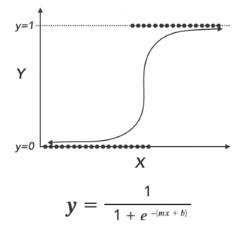


In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
lr = LogisticRegression()
parameters = {'C': [0.0001,0.001,0.01,0.1,1,10,100,1000]}
cv_lr=GridSearchCV(lr,parameters,cv=5)
cv_lr.fit(x_train,y_train.values.ravel())
print_results(cv_lr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


BEST PARAMS: {'C': 1}

0.661 (+/-0.068) for {'C': 0.0001}
0.67 (+/-0.077) for {'C': 0.001}
0.708 (+/-0.098) for {'C': 0.01}
0.777 (+/-0.134) for {'C': 0.1}
0.8 (+/-0.118) for {'C': 1}
0.794 (+/-0.116) for {'C': 10}
0.794 (+/-0.116) for {'C': 100}
0.794 (+/-0.116) for {'C': 1000}


In [25]:
#write model as pickle file
joblib.dump(cv_lr.best_estimator_,'/content/sample_data/LR_model.pkl')

['/content/sample_data/LR_model.pkl']

###Support Vector Machine
- **Best in BC short-and-fat data or when there are a lot of outliers.**
- 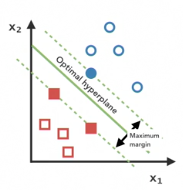

In [26]:
from sklearn.svm import SVC
SVC()

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
svm=SVC()
parameters = {'C': [0.1,1,10],'kernel':['linear','rbf']}
cv_svm=GridSearchCV(svm,parameters,cv=5)
cv_svm.fit(x_train,y_train.values.ravel())
print_results(cv_svm)

BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}

0.796 (+/-0.115) for {'C': 0.1, 'kernel': 'linear'}
0.654 (+/-0.06) for {'C': 0.1, 'kernel': 'rbf'}
0.796 (+/-0.115) for {'C': 1, 'kernel': 'linear'}
0.661 (+/-0.048) for {'C': 1, 'kernel': 'rbf'}
0.796 (+/-0.115) for {'C': 10, 'kernel': 'linear'}
0.684 (+/-0.07) for {'C': 10, 'kernel': 'rbf'}


In [28]:
#write model as pickle file
joblib.dump(cv_svm.best_estimator_,'/content/sample_data/SVM_model.pkl')

['/content/sample_data/SVM_model.pkl']

### Multi-layered perceptron
**NN Support both categorical and continious. Need Lot of data and used when needed high performance**
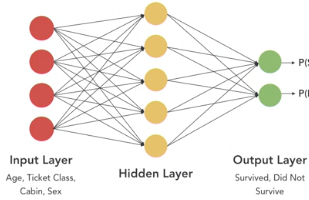
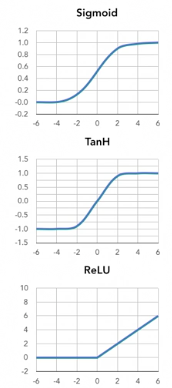 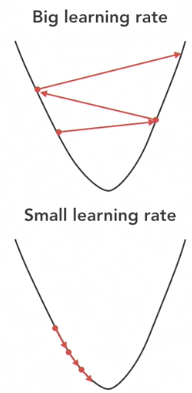

In [29]:
from sklearn.neural_network import MLPClassifier,MLPRegressor
print(MLPClassifier())
print(MLPRegressor())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, ve

In [30]:
mlp=MLPClassifier()
#hidden_layer_sizes gives (nodes,no of layers)
#constant has same learning rate; invscalling gradually decreases at each step ; adaptive has max jump initially and slow in the end
parameters = {'hidden_layer_sizes': [(10,),(50,),(100,)],
              'activation':['relu','logistic','tanh'],
              'learning_rate':['constant','invscaling','adaptive']}
cv_mlp=GridSearchCV(mlp,parameters,cv=5)
cv_mlp.fit(x_train,y_train.values.ravel())
print_results(cv_mlp)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


BEST PARAMS: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}

0.721 (+/-0.077) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.734 (+/-0.108) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.706 (+/-0.117) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.788 (+/-0.099) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.783 (+/-0.113) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.775 (+/-0.148) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.796 (+/-0.096) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.8 (+/-0.113) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.789 (+/-0.121) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learnin

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [31]:
#write model as pickle file
joblib.dump(cv_mlp.best_estimator_,'/content/sample_data/MLP_model.pkl')

['/content/sample_data/MLP_model.pkl']

###Random Forest
merges collection of **independent** decision trees for More accurate and stable prediction. **Ensemble method** (combine more ML model). **Both categorical and continious, Fast and flexible providing good performance**
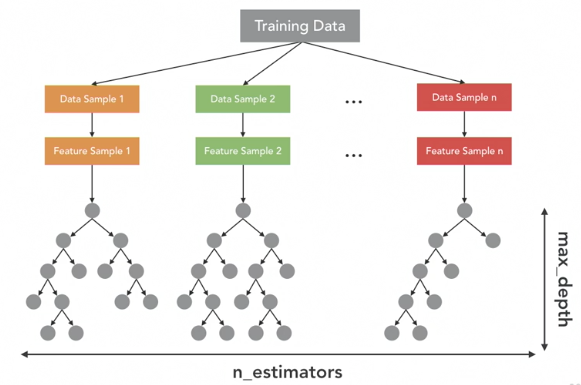
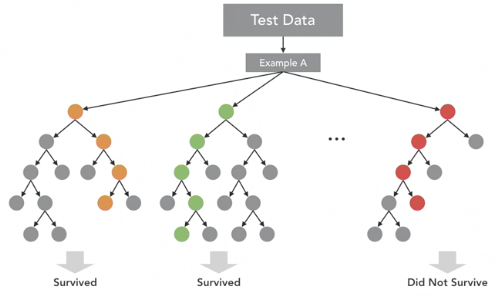

In [32]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
print(RandomForestClassifier())
print(RandomForestRegressor())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      rand

In [33]:
rfc=RandomForestClassifier()
#None will let tree go as deep it wants to complete training
parameters = {'n_estimators': [5,50,250],
              'max_depth':[2,5,8,16,32,None]}
cv_rfc=GridSearchCV(rfc,parameters,cv=5)
cv_rfc.fit(x_train,y_train.values.ravel())
print_results(cv_rfc)

BEST PARAMS: {'max_depth': 5, 'n_estimators': 250}

0.796 (+/-0.108) for {'max_depth': 2, 'n_estimators': 5}
0.796 (+/-0.114) for {'max_depth': 2, 'n_estimators': 50}
0.802 (+/-0.11) for {'max_depth': 2, 'n_estimators': 250}
0.818 (+/-0.028) for {'max_depth': 5, 'n_estimators': 5}
0.822 (+/-0.105) for {'max_depth': 5, 'n_estimators': 50}
0.826 (+/-0.077) for {'max_depth': 5, 'n_estimators': 250}
0.805 (+/-0.049) for {'max_depth': 8, 'n_estimators': 5}
0.82 (+/-0.06) for {'max_depth': 8, 'n_estimators': 50}
0.824 (+/-0.073) for {'max_depth': 8, 'n_estimators': 250}
0.796 (+/-0.036) for {'max_depth': 16, 'n_estimators': 5}
0.813 (+/-0.026) for {'max_depth': 16, 'n_estimators': 50}
0.813 (+/-0.035) for {'max_depth': 16, 'n_estimators': 250}
0.796 (+/-0.068) for {'max_depth': 32, 'n_estimators': 5}
0.818 (+/-0.058) for {'max_depth': 32, 'n_estimators': 50}
0.811 (+/-0.021) for {'max_depth': 32, 'n_estimators': 250}
0.794 (+/-0.035) for {'max_depth': None, 'n_estimators': 5}
0.811 (+/-0.034

In [34]:
#write model as pickle file
joblib.dump(cv_rfc.best_estimator_,'/content/sample_data/RF_model.pkl')

['/content/sample_data/RF_model.pkl']

###Boosting
Ensemble method combile all week model to one strong model. Unlike Random forest, each interation learns mistake from previous iteration.
- **Both classification and regression. flexible and fast recommended model.Cannot use in noisy dataset becouse it overfits**
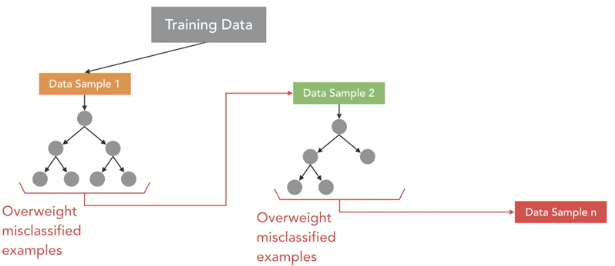
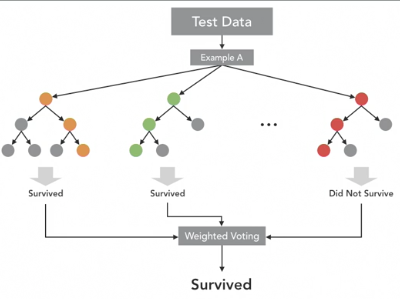

In [35]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
print(GradientBoostingClassifier())
print(GradientBoostingRegressor())

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
 

In [36]:
gbc=GradientBoostingClassifier()
#None will let tree go as deep it wants to complete training
parameters = {'n_estimators': [5,50,250,500],
              'max_depth':[1,3,5,7,9],
              'learning_rate':[0.01,0.1,1,10,100]}
cv_gbc=GridSearchCV(gbc,parameters,cv=5)
cv_gbc.fit(x_train,y_train.values.ravel())
print_results(cv_gbc)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.796 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.796 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.811 (+/-0.117) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.811 (+/-0.069) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.83 (+/-0.074) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.841 (+/-0.077) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.822 (+/-0.052) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.818 (+/-0.043) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.83 (+/-0.049) for {'learning_ra

In [37]:
#write model as pickle file
joblib.dump(cv_gbc.best_estimator_,'/content/sample_data/GB_model.pkl')

['/content/sample_data/GB_model.pkl']

## Best Model
- **Accuracy** (dataset size, complex relationship, outliers)
- **Latency** (train time, predict time)
- 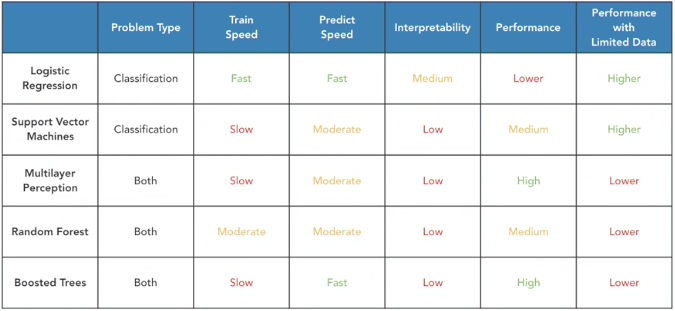

## Compare model results and select final model
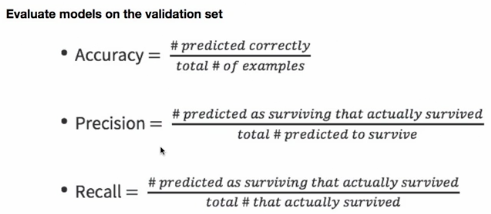

In [38]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
from time import time

In [39]:
models={}
for mdl in ['LR','SVM','MLP','RF','GB']:
  models[mdl]=joblib.load('/content/sample_data/{}_model.pkl'.format(mdl))
models

{'GB': GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.01, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=500,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=None, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 'LR': LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001,

In [40]:
def evaluate_model(name,model,features,labels):
  start=time()
  pred=model.predict(features)
  end=time()
  accuracy=round(accuracy_score(labels,pred),3)
  precision=round(precision_score(labels,pred),3)
  recall=round(recall_score(labels,pred),3)
  latency=round((end-start)*1000,2)
  print(f'{name} --Accuracy:{accuracy} / Precision:{precision} / Recall:{recall} / Latency:{latency}ms')


###Find best model from validation data

In [41]:
for name, mdl in models.items():
  evaluate_model(name,mdl,x_val,y_val)

LR --Accuracy:0.814 / Precision:0.8 / Recall:0.715 / Latency:3.02ms
SVM --Accuracy:0.789 / Precision:0.758 / Recall:0.698 / Latency:5.22ms
MLP --Accuracy:0.812 / Precision:0.791 / Recall:0.721 / Latency:9.96ms
RF --Accuracy:0.834 / Precision:0.857 / Recall:0.704 / Latency:42.73ms
GB --Accuracy:0.834 / Precision:0.852 / Recall:0.709 / Latency:7.24ms


##Final Result

Random forest and Gradient Boosting are giving best accuracy, precision and recall score on validation data for the titanic dataset. tradeoff decides further the best model; Considering Latency we decide to pick Gradient Boosting as best model

### Evaluate the validated best model(Logistic regression) on test data

In [43]:
evaluate_model('Gradient Boosting',models['GB'],x_test,y_test)

Gradient Boosting --Accuracy:0.876 / Precision:0.929 / Recall:0.718 / Latency:7.5ms
